In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# macOS용 한글 폰트 설정

# macOS에서 사용 가능한 한글 폰트들
macos_korean_fonts = [
    '/System/Library/Fonts/AppleGothic.ttf',
    '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    '/Library/Fonts/NanumGothic.ttf',
    '/Library/Fonts/NanumBarunGothic.ttf',
    '/System/Library/Fonts/PingFang.ttc'
]

# 사용 가능한 폰트 찾기
available_font = None
for font_path in macos_korean_fonts:
    if os.path.exists(font_path):
        available_font = font_path
        print(f"사용 가능한 폰트 발견: {font_path}")
        break

if available_font:
    # 폰트 설정
    font_prop = fm.FontProperties(fname=available_font)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False
    print(f"폰트 설정 완료: {font_prop.get_name()}")
else:
    # 기본 폰트로 설정
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 AppleGothic 폰트 사용")

사용 가능한 폰트 발견: /System/Library/Fonts/AppleSDGothicNeo.ttc
폰트 설정 완료: Apple SD Gothic Neo


In [3]:
# 데이터 로드
print("포천 인구 데이터 로드 중...")
df = pd.read_csv('../01_data_analysis/data/pocheon_population_2024.csv')

print(f"데이터 크기: {df.shape}")
print(f"컬럼 수: {len(df.columns)}")
print(f"행 수: {len(df)}")

포천 인구 데이터 로드 중...
데이터 크기: (203255, 34)
컬럼 수: 34
행 수: 203255


In [4]:
# 기본 정보 확인
print("\n=== 데이터 기본 정보 ===")
print(df.info())

print("\n=== 첫 5행 확인 ===")
print(df.head())

print("\n=== 컬럼명 확인 ===")
print(df.columns.tolist())


=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203255 entries, 0 to 203254
Data columns (total 34 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ADMI_CD   203255 non-null  int64  
 1   CTY_NM    203255 non-null  object 
 2   ADMI_NM   203255 non-null  object 
 3   TIME_CD   203255 non-null  int64  
 4   FORN_GB   203255 non-null  object 
 5   M_10_CNT  203255 non-null  float64
 6   M_15_CNT  203255 non-null  float64
 7   M_20_CNT  203255 non-null  float64
 8   M_25_CNT  203255 non-null  float64
 9   M_30_CNT  203255 non-null  float64
 10  M_35_CNT  203255 non-null  float64
 11  M_40_CNT  203255 non-null  float64
 12  M_45_CNT  203255 non-null  float64
 13  M_50_CNT  203255 non-null  float64
 14  M_55_CNT  203255 non-null  float64
 15  M_60_CNT  203255 non-null  float64
 16  M_65_CNT  203255 non-null  float64
 17  M_70_CNT  203255 non-null  float64
 18  F_10_CNT  203255 non-null  float64
 19  F_15_CNT  203255 non-null

In [5]:
# 데이터 전처리
print("\n=== 데이터 전처리 ===")

# 날짜 컬럼 생성
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']].assign(DAY=1))

# 면(ADMI_NM)별 데이터 확인
print(f"\n포천시 면 목록: {df['ADMI_NM'].unique()}")

# 시간대별 분석
print(f"\n시간대 목록: {sorted(df['TIME_CD'].unique())}")

# 성별/연령대별 컬럼 분리
age_gender_cols = [col for col in df.columns if any(x in col for x in ['M_', 'F_']) and 'CNT' in col]
print(f"\n연령대/성별 컬럼 수: {len(age_gender_cols)}")


=== 데이터 전처리 ===

포천시 면 목록: ['군내면' '영북면' '내촌면' '관인면' '이동면' '신북면' '일동면' '화현면' '선단동' '가산면' '창수면' '소흘읍'
 '영중면' '포천동']

시간대 목록: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

연령대/성별 컬럼 수: 26



=== 1. 면별 총 인구 분석 ===
ADMI_NM
소흘읍    85885651.77
포천동    30496321.99
선단동    28406644.24
신북면    24468260.34
가산면    19869662.57
군내면    19707418.35
영북면    18236356.37
일동면    16613144.32
이동면    13164217.08
내촌면     9957498.17
영중면     9923655.56
관인면     6338669.23
화현면     6175379.10
창수면     4381817.74
dtype: float64


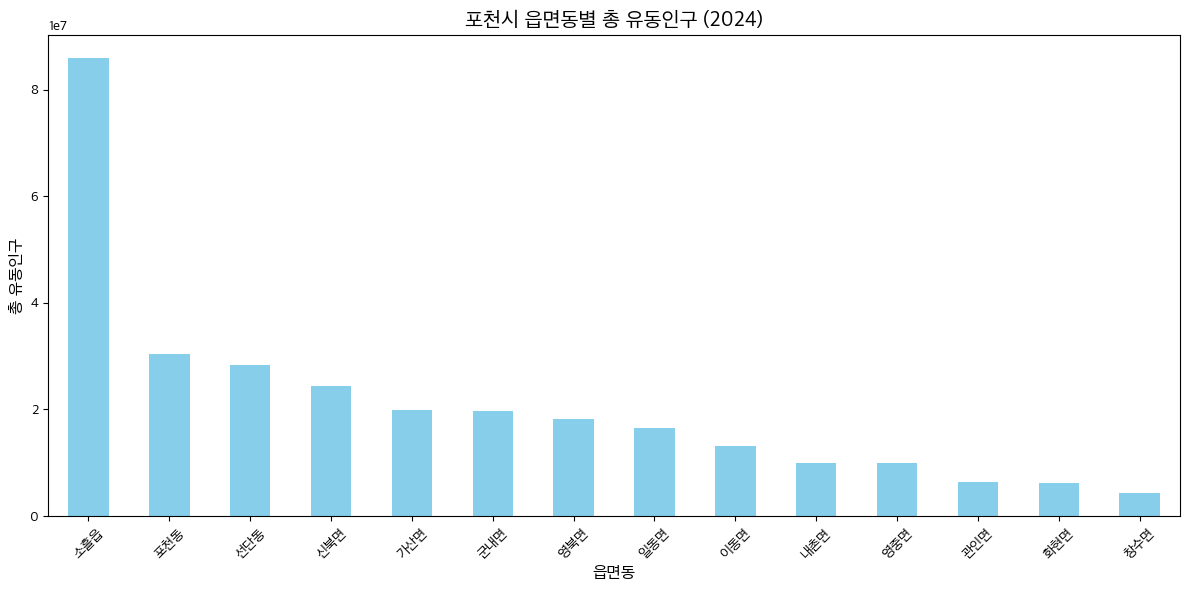

In [6]:
# 1. 면별 총 인구 분석
print("\n=== 1. 면별 총 인구 분석 ===")
area_population = df.groupby('ADMI_NM')[age_gender_cols].sum().sum(axis=1).sort_values(ascending=False)
print(area_population)

plt.figure(figsize=(12, 6))
area_population.plot(kind='bar', color='skyblue')
plt.title('포천시 읍면동별 총 유동인구 (2024)', fontsize=15, fontweight='bold')
plt.xlabel('읍면동', fontsize=12)
plt.ylabel('총 유동인구', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== 2. 시간대별 유동인구 분석 ===
TIME_CD
0      5620082.78
1      6009037.57
2      5883535.16
3      5836761.84
4      5920302.37
5      6404652.83
6      8132718.09
7     10485721.96
8     13031917.99
9     14934582.50
10    16515657.08
11    18244267.18
12    19664852.39
13    19205692.39
14    18626082.24
15    18014790.01
16    16913963.54
17    15759480.08
18    14623015.01
19    13507908.31
20    12209226.29
21    10657342.22
22     9509440.10
23     7913666.90
dtype: float64


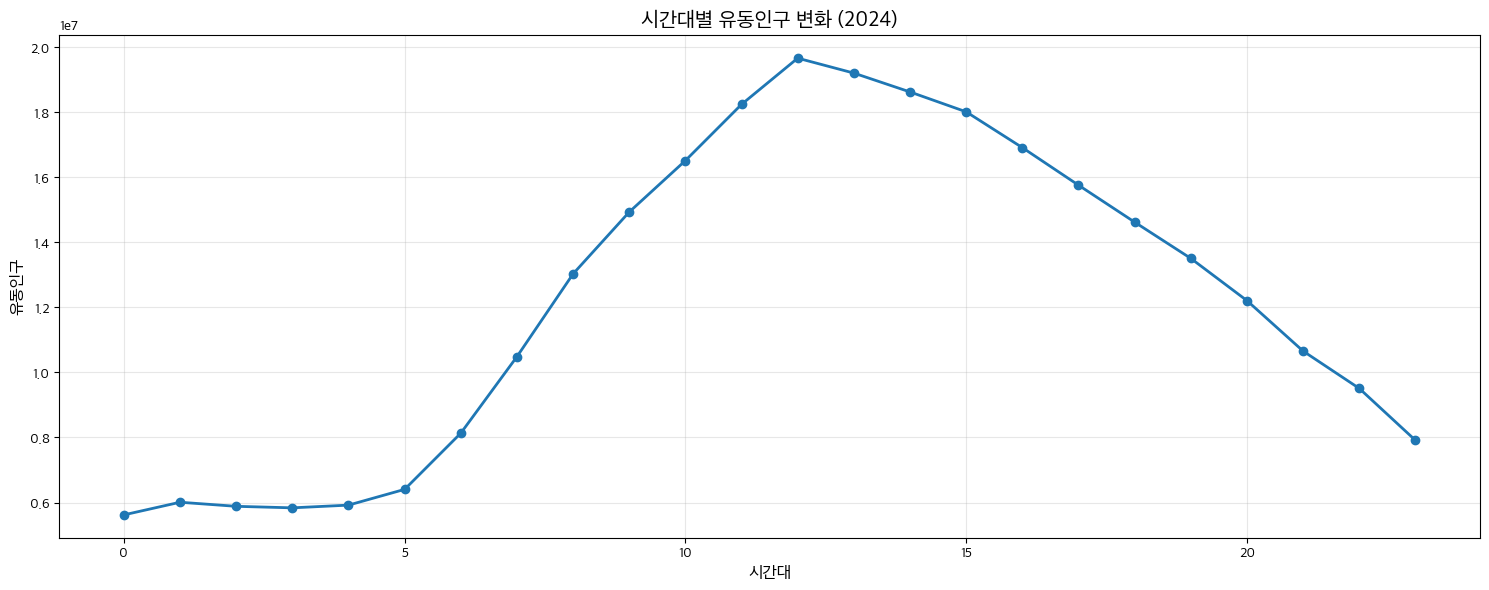

In [7]:
# 2. 시간대별 유동인구 분석
print("\n=== 2. 시간대별 유동인구 분석 ===")
time_population = df.groupby('TIME_CD')[age_gender_cols].sum().sum(axis=1)
print(time_population)

plt.figure(figsize=(15, 6))
time_population.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('시간대별 유동인구 변화 (2024)', fontsize=15, fontweight='bold')
plt.xlabel('시간대', fontsize=12)
plt.ylabel('유동인구', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== 3. 연령대별 분석 ===


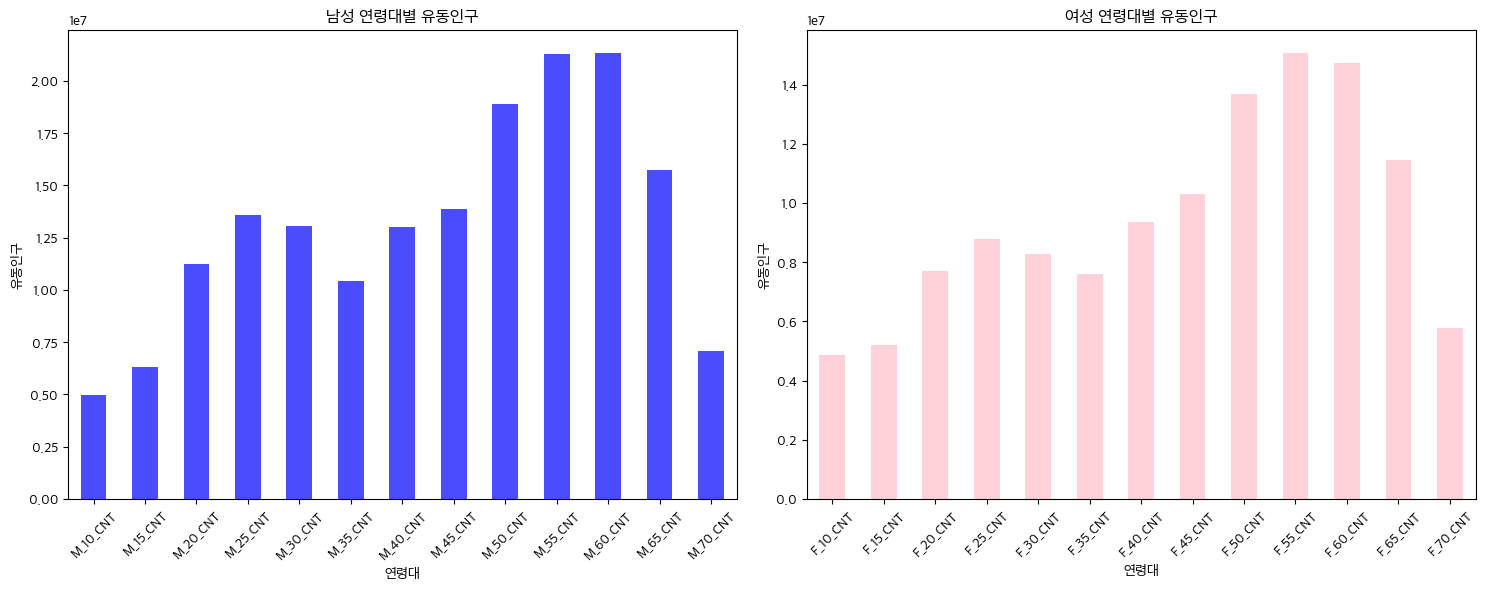

In [8]:
# 3. 연령대별 분석
print("\n=== 3. 연령대별 분석 ===")

# 남성 연령대별
male_cols = [col for col in age_gender_cols if col.startswith('M_')]
male_age_data = df[male_cols].sum()

# 여성 연령대별
female_cols = [col for col in age_gender_cols if col.startswith('F_')]
female_age_data = df[female_cols].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 남성 연령대별
male_age_data.plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title('남성 연령대별 유동인구', fontsize=12, fontweight='bold')
ax1.set_xlabel('연령대')
ax1.set_ylabel('유동인구')
ax1.tick_params(axis='x', rotation=45)

# 여성 연령대별
female_age_data.plot(kind='bar', ax=ax2, color='pink', alpha=0.7)
ax2.set_title('여성 연령대별 유동인구', fontsize=12, fontweight='bold')
ax2.set_xlabel('연령대')
ax2.set_ylabel('유동인구')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


=== 4. 월별 트렌드 분석 ===
MONTH
1     26657917.43
2     25820448.73
3     29594024.87
4     28317428.95
5     39922588.90
6     28300522.51
7     27657810.46
8     29181425.47
9     28636091.73
10    29536437.78
dtype: float64


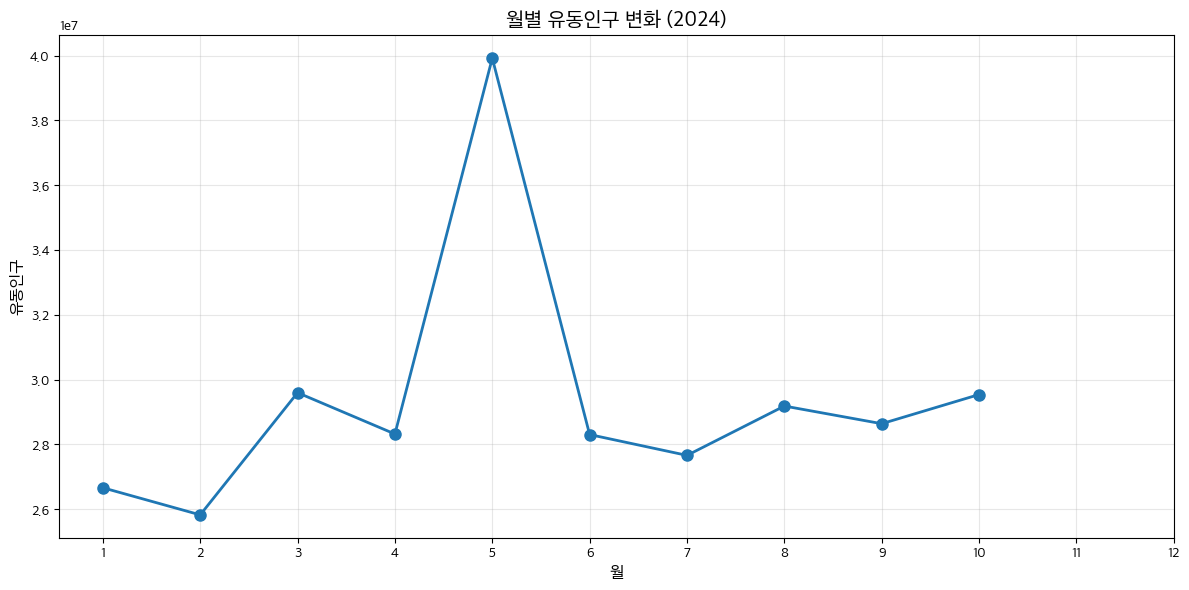

In [9]:
# 4. 월별 트렌드 분석
print("\n=== 4. 월별 트렌드 분석 ===")
monthly_population = df.groupby('MONTH')[age_gender_cols].sum().sum(axis=1)
print(monthly_population)

plt.figure(figsize=(12, 6))
monthly_population.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('월별 유동인구 변화 (2024)', fontsize=15, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('유동인구', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


=== 5. 읍면동별 시간대별 유동인구 히트맵 ===


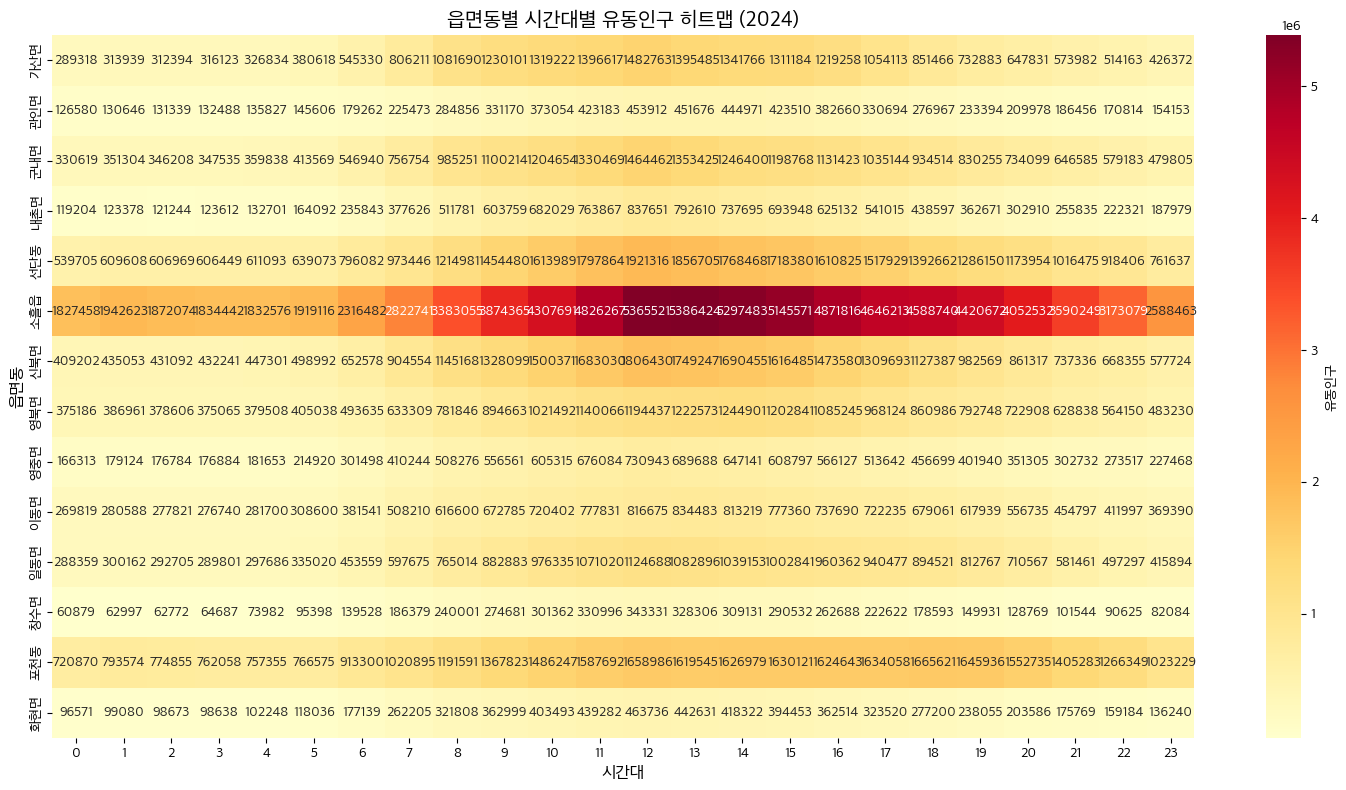

In [10]:
# 5. 읍면동별 시간대별 히트맵
print("\n=== 5. 읍면동별 시간대별 유동인구 히트맵 ===")
area_time_heatmap = df.groupby(['ADMI_NM', 'TIME_CD'])[age_gender_cols].sum().sum(axis=1).unstack()

plt.figure(figsize=(15, 8))
sns.heatmap(area_time_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': '유동인구'})
plt.title('읍면동별 시간대별 유동인구 히트맵 (2024)', fontsize=15, fontweight='bold')
plt.xlabel('시간대', fontsize=12)
plt.ylabel('읍면동', fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
# 6. 상세 통계
print("\n=== 6. 상세 통계 ===")
print(f"총 데이터 수: {len(df):,}개")
print(f"총 유동인구: {df[age_gender_cols].sum().sum():,.0f}명")
print(f"평균 일일 유동인구: {df.groupby(['YEAR', 'MONTH', 'DAY'])[age_gender_cols].sum().sum(axis=1).mean():,.0f}명")
print(f"최대 일일 유동인구: {df.groupby(['YEAR', 'MONTH', 'DAY'])[age_gender_cols].sum().sum(axis=1).max():,.0f}명")
print(f"최소 일일 유동인구: {df.groupby(['YEAR', 'MONTH', 'DAY'])[age_gender_cols].sum().sum(axis=1).min():,.0f}명")



=== 6. 상세 통계 ===
총 데이터 수: 203,255개
총 유동인구: 293,624,697명
평균 일일 유동인구: 962,704명
최대 일일 유동인구: 1,534,059명
최소 일일 유동인구: 729,741명



=== 7. 성별 비율 분석 ===


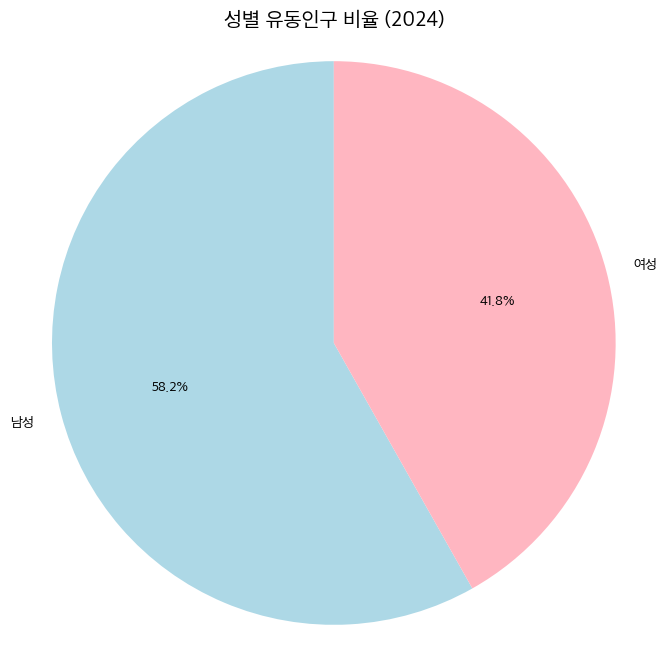

남성: 170,826,313명 (58.2%)
여성: 122,798,384명 (41.8%)


In [12]:
# 7. 성별 비율 분석
print("\n=== 7. 성별 비율 분석 ===")
total_male = df[male_cols].sum().sum()
total_female = df[female_cols].sum().sum()
gender_ratio = pd.Series({'남성': total_male, '여성': total_female})

plt.figure(figsize=(8, 8))
plt.pie(gender_ratio.values, labels=gender_ratio.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightpink'], startangle=90)
plt.title('성별 유동인구 비율 (2024)', fontsize=15, fontweight='bold')
plt.axis('equal')
plt.show()

print(f"남성: {total_male:,.0f}명 ({total_male/(total_male+total_female)*100:.1f}%)")
print(f"여성: {total_female:,.0f}명 ({total_female/(total_male+total_female)*100:.1f}%)")



=== 8. 요일별 분석 ===


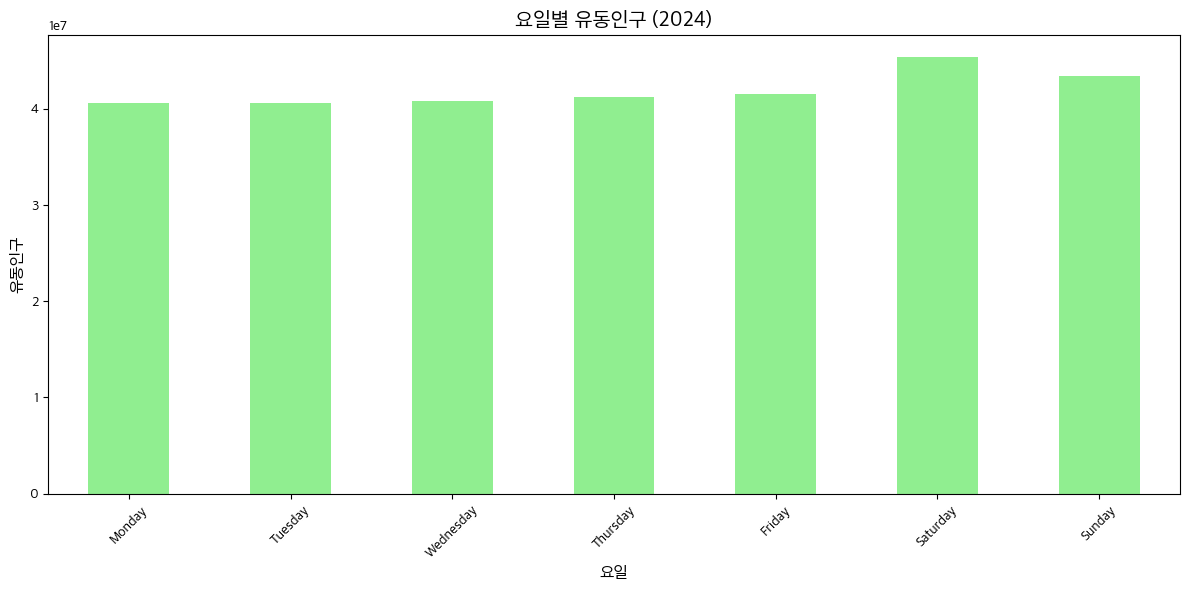

In [13]:
# 8. 요일별 분석 (가능한 경우)
print("\n=== 8. 요일별 분석 ===")
if 'DAY' in df.columns:
    df['WEEKDAY'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']]).dt.day_name()
    weekday_population = df.groupby('WEEKDAY')[age_gender_cols].sum().sum(axis=1)
    
    # 요일 순서 정렬
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_population = weekday_population.reindex(weekday_order)
    
    plt.figure(figsize=(12, 6))
    weekday_population.plot(kind='bar', color='lightgreen')
    plt.title('요일별 유동인구 (2024)', fontsize=15, fontweight='bold')
    plt.xlabel('요일', fontsize=12)
    plt.ylabel('유동인구', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
print("\n=== 분석 완료 ===")
print("포천시 유동인구 데이터 분석이 완료되었습니다.")

print("=== 유동인구 분석 항목 요약 ===")
print("1. 면별 총 인구 분석 - 포천시 내 각 읍면동별로 전체 유동인구를 집계하여 지역별 인구 분포를 파악합니다.")
print("2. 시간대별 유동인구 분석 - 24시간 시간대별로 유동인구 변화를 분석하여 주요 활동 시간대를 확인합니다.")
print("3. 연령대별 분석 - 남성/여성별로 연령대(10세~70세+) 유동인구를 분석하여 주요 연령층을 파악합니다.")
print("4. 월별 트렌드 분석 - 2024년 월별로 유동인구 변화를 시계열로 분석하여 계절별 인구 변동을 확인합니다.")
print("5. 읍면동별 시간대별 유동인구 히트맵 - 지역과 시간대별로 유동인구를 교차 분석하여 지역·시간대별 인구 집중도를 시각화합니다.")
print("6. 상세 통계 - 총 데이터 수, 총 유동인구, 평균/최대/최소 일일 유동인구 등 기본 통계값을 제공합니다.")
print("7. 성별 비율 분석 - 전체 유동인구 중 남성/여성 비율을 파이차트로 분석하여 성별 분포를 확인합니다.")
print("8. 요일별 분석 - 요일별로 유동인구를 집계하여 주중/주말 인구 패턴을 분석합니다.")
print("포천시 2024년 유동인구 데이터 분석이 완료되었습니다.")


=== 분석 완료 ===
포천시 유동인구 데이터 분석이 완료되었습니다.
=== 유동인구 분석 항목 요약 ===
1. 면별 총 인구 분석 - 포천시 내 각 읍면동별로 전체 유동인구를 집계하여 지역별 인구 분포를 파악합니다.
2. 시간대별 유동인구 분석 - 24시간 시간대별로 유동인구 변화를 분석하여 주요 활동 시간대를 확인합니다.
3. 연령대별 분석 - 남성/여성별로 연령대(10세~70세+) 유동인구를 분석하여 주요 연령층을 파악합니다.
4. 월별 트렌드 분석 - 2024년 월별로 유동인구 변화를 시계열로 분석하여 계절별 인구 변동을 확인합니다.
5. 읍면동별 시간대별 유동인구 히트맵 - 지역과 시간대별로 유동인구를 교차 분석하여 지역·시간대별 인구 집중도를 시각화합니다.
6. 상세 통계 - 총 데이터 수, 총 유동인구, 평균/최대/최소 일일 유동인구 등 기본 통계값을 제공합니다.
7. 성별 비율 분석 - 전체 유동인구 중 남성/여성 비율을 파이차트로 분석하여 성별 분포를 확인합니다.
8. 요일별 분석 - 요일별로 유동인구를 집계하여 주중/주말 인구 패턴을 분석합니다.
포천시 2024년 유동인구 데이터 분석이 완료되었습니다.
